In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filenames = [
    '2020.10.05.11.01.55_eac37b87-19c6-42db-b905-827579708e5a_loc_data_1976db3cf5673694adc6a20cc1445803.csv',
    '2020.10.05.11.06.34_5f631ec4-4b74-495d-b1f8-ec2f51d5244a_loc_data_d7c5cdb6460b2437fd18cf864e0ce0cf.csv',
    '2020.10.05.11.06.52_0dfaae37-88a5-4f19-abbe-658ee94a3c30_loc_data_9469319e329a7f28b5a8688f3ff16477.csv'
]

raw = []
data = []
for i in range(0, len(filenames)):
    rawData = pd.read_csv(filenames[i], delimiter = ',')
    raw.append(rawData)
    convergedRows = rawData['convergenceStatus'] == 'CONVERGED'
    
    #naive way of getting the converged single location
    orig = list(convergedRows)
    rows = list(convergedRows)

    for i in range(0, len(convergedRows) - 1):
        if convergedRows[i] == True and convergedRows[i+1] == False:
            rows[i] = True
        else:
            rows[i] = False
    
    data.append(rawData[rows])

#data1 = pd.read_csv(filenames[0], delimiter = ',')
#data2 = pd.read_csv(filenames[1], delimiter = ',')


<AxesSubplot:xlabel='longitude'>

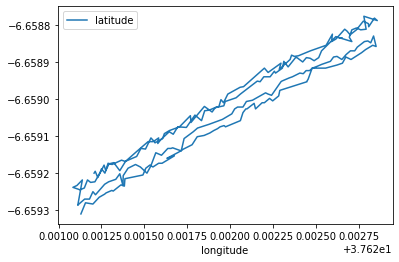

In [3]:
i = 1
data[i].plot(x='longitude', y='latitude')


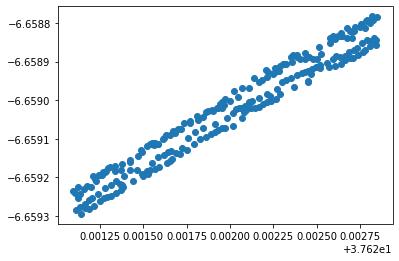

In [5]:
# compute moving average
window = 10
meanLon = data[i]['longitude'].rolling(2).mean()
meanLat = data[i]['latitude'].rolling(2).mean()
plt.scatter(meanLon, meanLat)

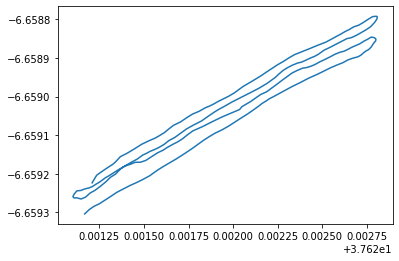

In [182]:
plt.plot(meanLon, meanLat)

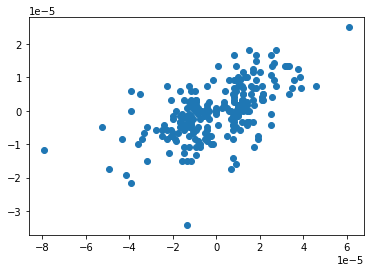

In [6]:
lonBias = data[i]['longitude'] - meanLon
latBias = data[i]['latitude'] - meanLat
plt.scatter(lonBias, latBias)

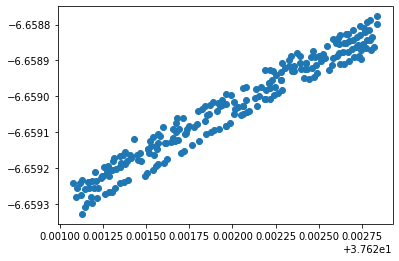

In [184]:
plt.scatter(data[i]['longitude'], data[i]['latitude'])

<AxesSubplot:xlabel='longitude'>

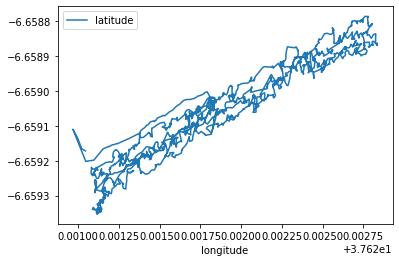

In [171]:
i = 0
raw[i].plot(x='longitude', y='latitude')


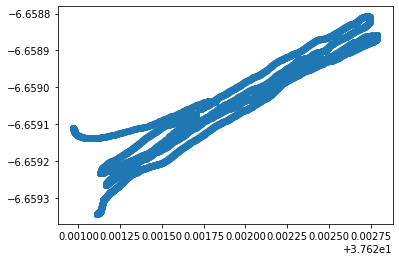

In [174]:
meanRawLon = raw[i]['longitude'].rolling(100).mean()
meanRawLat = raw[i]['latitude'].rolling(100).mean()
plt.scatter(meanRawLon, meanRawLat)

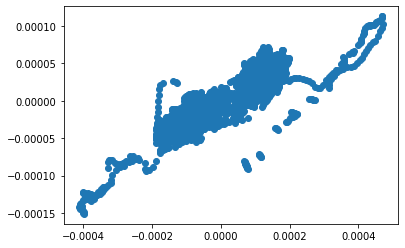

In [176]:
rawLonBias = raw[i]['longitude'] - meanRawLon
rawLatBias = raw[i]['latitude'] - meanRawLat
plt.scatter(rawLonBias, rawLatBias)

<AxesSubplot:>

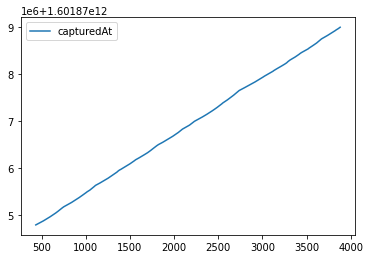

In [142]:
data[i].plot(y="capturedAt")

In [145]:
data[i].to_csv('points_student')